#  Решение задачи регрессии при помощи пакета `torch`. Метрики.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann 
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://github.com/Lightning-AI/torchmetrics
* https://pytorch.org/docs/stable/generated/torch.no_grad.html
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/ecosystem/metrics.html#torchmetrics

## Задачи для совместного разбора

In [54]:
import torch as th

1\. Используя реализацию из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim.SGD`.

In [55]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)


model = th.nn.Sequential(
    th.nn.Linear(4,16)
)

In [56]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, n_inputs: int, n_hidden:int, act = nn.ReLU()): #, n_outputs: int = 1, activation: ):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, n_hidden)
        self.act = act
        self.fc2 = nn.Linear(n_hidden, 1)
        
    
    def forward(self, X: th.Tensor) -> th.Tensor:
        # batch x n_inputs
        out = self.fc1(X) # batch x n_hidden
        out = self.act(out)
        # out = X.relu()
        # out = F.relu(out)
        out = self.fc2(out) # batch x 1
        return out
    
    



In [57]:
n_inputs = 4
n_hidden = 2
model = nn.Sequential(
        nn.Linear(n_inputs, n_hidden),
        nn.ReLU(),
        nn.Linear(n_hidden,1)
)

In [58]:
y_pred = model(X)

In [59]:
y_pred.shape
y_pred

tensor([[ 0.0145],
        [-0.3528],
        [-0.2309],
        [-0.3091],
        [-0.5571],
        [-0.4997],
        [-0.2138],
        [-0.2696],
        [-0.4358],
        [-0.4089],
        [ 0.0377],
        [-0.3221],
        [-0.3593],
        [-0.4350],
        [-0.5708],
        [-0.0809],
        [-0.5092],
        [-0.2654],
        [-0.7044],
        [-0.3678],
        [-0.1125],
        [-0.2804],
        [-0.3961],
        [ 0.0258],
        [-0.1277],
        [ 0.0225],
        [ 0.1195],
        [-0.3979],
        [-0.0685],
        [-0.5835],
        [-0.7051],
        [-0.4791],
        [ 0.0387],
        [-0.3406],
        [-0.3601],
        [-0.3900],
        [-0.3121],
        [-0.0421],
        [-0.4699],
        [-0.2030],
        [-0.6167],
        [-0.2290],
        [-0.8456],
        [-0.5979],
        [-0.6213],
        [-0.2142],
        [-0.6396],
        [-0.5027],
        [-0.3836],
        [-0.2172],
        [-0.3056],
        [-0.4767],
        [-0.

In [60]:
criterion = nn.MSELoss()
loss = criterion(y_pred.flatten(), y)
loss

tensor(9583.5947, grad_fn=<MseLossBackward0>)

In [61]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr = 0.001)



In [62]:
model = Net(4,2)

y_pred = model(X).flatten()
loss = criterion(y_pred,y)
loss.backward()
optimizer.step()

optimizer.zero_grad()



## Задачи для самостоятельного решения

In [110]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm
from sklearn.datasets import make_regression
import torch as th
import time

<p class="task" id="1"></p>

1\. Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim.SGD`. Для создания модели опишите класс `SineModel`.

Предлагаемая архитектура нейронной сети: 
1. Полносвязный слой с 100 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте промежуточные прогнозы моделей. Визуализируйте облако точек и прогнозы модели в начале, середине и после окончания процесса обучения (не обязательно три, можно взять больше промежуточных вариантов).

Выведите график изменения значения функции потерь в процессе обучения. Логику расчета значения функции потерь на уровне эпохи реализуйте самостоятельно.

- [x] Проверено на семинаре

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size()) 

Отойдем от предложенной архитектуры нейронной сети:

1. Полносвязный слой с 16 нейронами
2. Активация ReLU
3. Полносвязный слой с 32 нейроном
4. Активация ReLU
5. Полносвязный слой с 1 нейроном


In [74]:
class SineModel(nn.Module):
    def __init__(self, n_features: int, n_hidden1: int = 16, n_hidden2 :int = 32, n_out: int = 1) -> None:
        super().__init__()
        self.fc1 = nn.Linear(n_features, n_hidden1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden2, n_out)
        
    
    def forward(self, X: th.Tensor) -> th.Tensor:
        # batch x n_features
        out = self.fc1(X) # batch x n_hidden1
        out = self.act1(out) # batch x n_hidden1
        out = self.fc2(out) # batch x n_hidden2
        out = self.act2(out) # batch x n_hidden2
        out = self.fc3(out) # batch x n_out

        return out

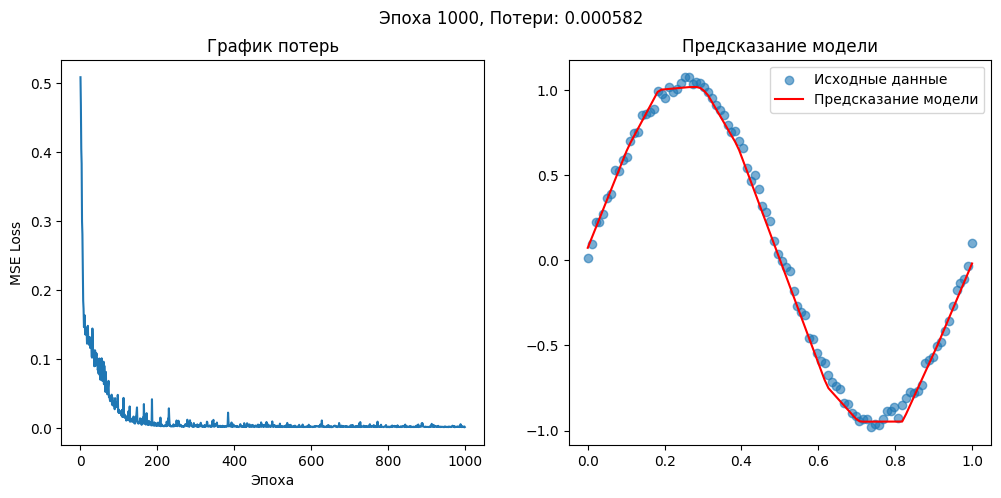

In [ ]:
dset = TensorDataset(X,y)
loader = DataLoader(dset, batch_size=16, shuffle=True)
model = SineModel(X.shape[1], 16, 32)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.08)

EPOCHS = 1000
losses = []

for epoch in range(EPOCHS+1):
    e_loss = 0
    for X_batch, y_batch in loader:
        y_pred = model(X_batch).flatten()
        loss = criterion(y_pred, y_batch.flatten())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        e_loss+=loss.item()
    
    
    e_loss /= len(loader)
    losses.append(e_loss)
    if (epoch)%10==0:
    #     print(f'epoch {epoch+1}, loss {e_loss}')
        
        clear_output(wait=True)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        ax1.plot(losses)
        ax1.set_title("График потерь")
        ax1.set_xlabel("Эпоха")
        ax1.set_ylabel("MSE Loss")

        ax2.scatter(X.numpy(), y.numpy(), label='Исходные данные', alpha=0.6)
        ax2.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Предсказание модели')
        ax2.set_title("Предсказание модели")
        ax2.legend()
        
        fig.suptitle(f"Эпоха {epoch}, Потери: {loss.item():.6f}")
        
        plt.show()
        

<p class="task" id="2"></p>

2\. Повторите решение задачи 1, изменив модель. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети: 
1. Полносвязный слой с 50 нейронами
2. Активация Tanh
3. Полносвязный слой с 1 нейроном

- [x] Проверено на семинаре

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

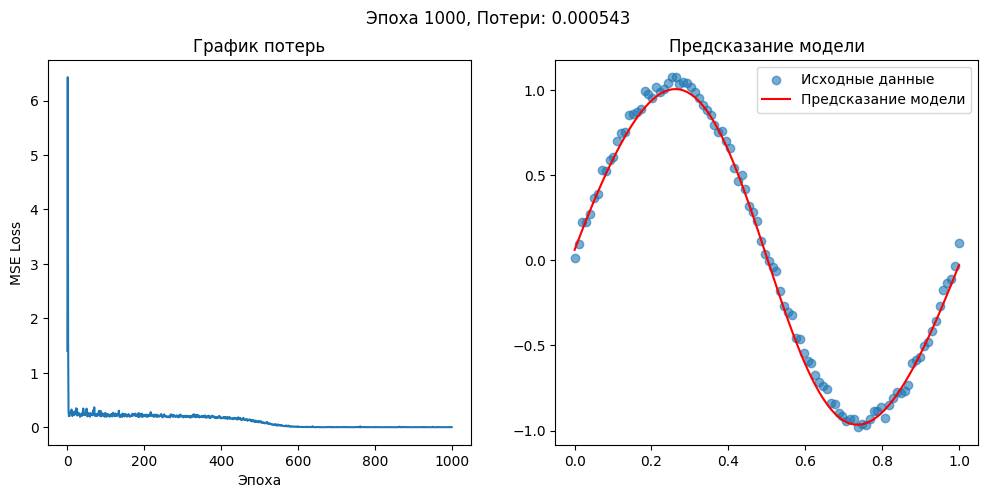

In [79]:
dset = TensorDataset(X,y)
loader = DataLoader(dset, batch_size=16, shuffle=True)
model = nn.Sequential(
    nn.Linear(X.shape[1],50),
    nn.Tanh(),
    nn.Linear(50, 1)
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.07)

EPOCHS = 1000
losses = []

for epoch in range(EPOCHS+1):
    e_loss = 0
    for X_batch, y_batch in loader:
        y_pred = model(X_batch).flatten()
        loss = criterion(y_pred, y_batch.flatten())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        e_loss+=loss.item()
    
    
    e_loss /= len(loader)
    losses.append(e_loss)
    if (epoch)%10==0:
    #     print(f'epoch {epoch+1}, loss {e_loss}')
        
        clear_output(wait=True)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        ax1.plot(losses)
        ax1.set_title("График потерь")
        ax1.set_xlabel("Эпоха")
        ax1.set_ylabel("MSE Loss")

        ax2.scatter(X.numpy(), y.numpy(), label='Исходные данные', alpha=0.6)
        ax2.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Предсказание модели')
        ax2.set_title("Предсказание модели")
        ax2.legend()
        
        fig.suptitle(f"Эпоха {epoch}, Потери: {loss.item():.6f}")
        
        plt.show()

<p class="task" id="3"></p>

3\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim.SGD`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде. 

- [x] Проверено на семинаре

In [122]:
X, y, coef = make_regression(
    n_samples=10000, 
    n_features=10, 
    n_informative=6, 
    coef=True, 
    bias=0.5, 
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [133]:
def run_training(device_name: str, model):
    if device_name=='cuda':
        if not torch.cuda.is_available():
            return 'cannot use cuda'
    device = torch.device(device_name)
    dset = TensorDataset(X, y)
    loader = DataLoader(dset, batch_size=512, shuffle=True)

    
    model.to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001) 
    losses = []
    start_time = time.time()
    for epoch in tqdm(range(EPOCHS), desc=f"Тренировка на {device.type.upper()}"):
        e_loss = 0
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        e_loss /= len(loader)
        losses.append(e_loss)
        if (epoch+1)%100==0:
            print(f'epoch {epoch+1:^5}, loss {e_loss:.8f}')
    
    end_time = time.time() - start_time
    print(f"Время тренировки на {device.type.upper()}: {end_time:.2f} секунд")
    fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

    ax1.plot(losses)
    ax1.set_title(f"График потерь {device_name}")
    ax1.set_xlabel("Эпоха")
    ax1.set_ylabel("Loss")

    fig.suptitle(f"Эпох {EPOCHS}\nПотери: {e_loss:.7f}\nВремя: {end_time} секунд", y=1.3)

    plt.show()
    return end_time

Тренировка на CPU:   0%|          | 0/200 [00:00<?, ?it/s]

epoch  100 , loss 0.00000000
epoch  200 , loss 0.00000000
Время тренировки на CPU: 51.12 секунд


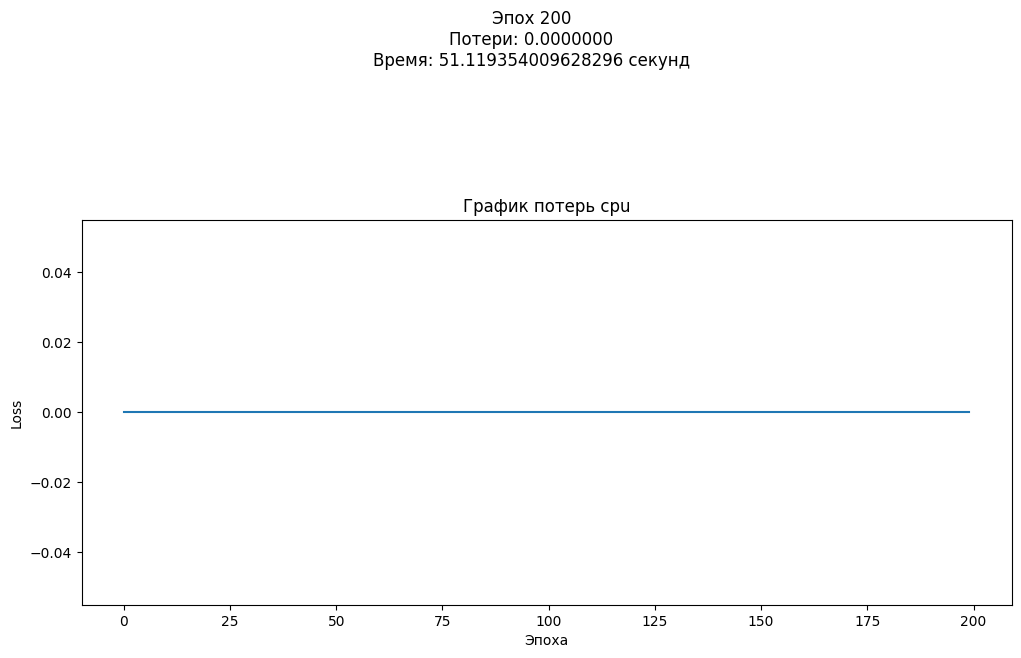

Тренировка на CUDA:   0%|          | 0/200 [00:00<?, ?it/s]

epoch  100 , loss 0.00000000
epoch  200 , loss 0.00000000
Время тренировки на CUDA: 26.18 секунд


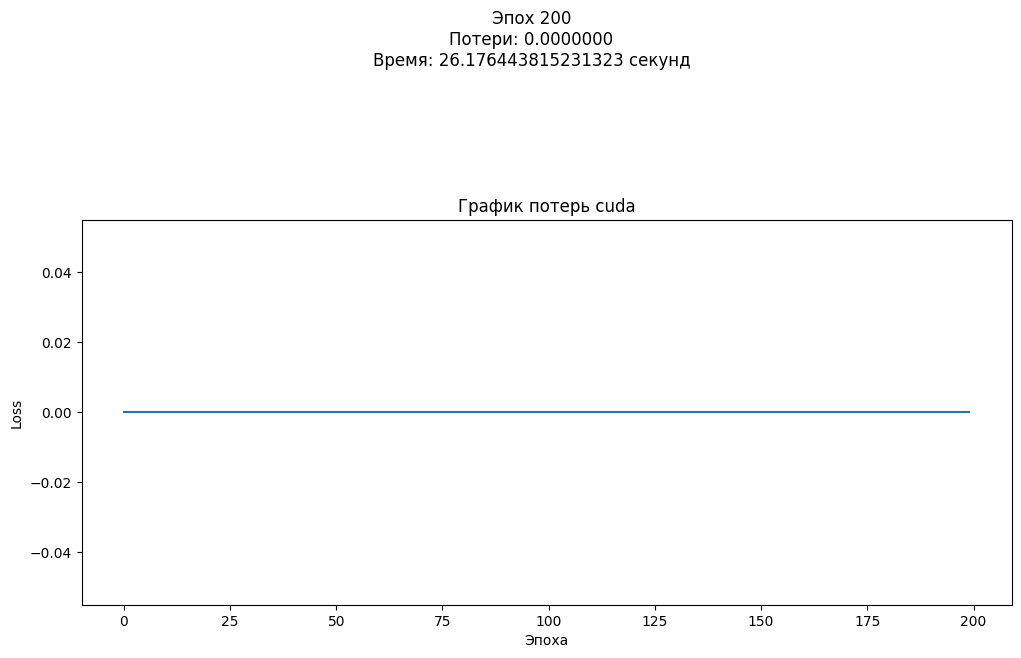

26.176443815231323

In [134]:
EPOCHS = 200
model = nn.Sequential(
    nn.Linear(X.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 1024),       
    nn.ReLU(),
    nn.Linear(1024, 512),      
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 1)           
)
run_training('cpu',model)
run_training('cuda',model)

<p class="task" id="4"></p>

4\. Повторите решение задач 1-2, используя для расчета значения функции потерь за эпоху метрику `MeanMetric` из пакета `torchmetrics`. Добавьте в цикл обучения расчет метрики $R^2$ (воспользуйтесь реализацией из `torchmetrics`). Выведите на экран график изменения значения функции потерь и метрики $R^2$ по эпохам в процессе обучения.

<p class="task" id="5"></p>

5\. Повторите решение задач 1-2, изменив функцию потерь. Обучите модель, используя три функции потерь: `MSELoss`, `L1Loss` и `HuberLoss` - и выведите на одном графике динамику изменения метрики $R^2$ по эпохам для каждой модели в процессе обучения. Добавьте подписи полученных кривых.

- [ ] Проверено на семинаре

<p class="task" id="6"></p>

6\. Повторите решение задач 1-2, разделив датасет на обучающую и тестовую выборку в соотношении 80% на 20%. Обучите модель. Для тестовой выборки посчитайте и выведите на экран значения метрик:

- MAE;
- MAPE;
- MSE;
- MSLE (MeanSquaredLogError).
 

- [ ] Проверено на семинаре